<a href="https://www.kaggle.com/code/sjagkoo7/binary-classification-of-machine-failures-s3e17?scriptVersionId=133640025" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


# Read the dataset

In [2]:
sample=pd.read_csv("/kaggle/input/playground-series-s3e17/sample_submission.csv")
train=pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")

# Pre-processing

In [3]:
sample.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


In [4]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               90954 non-null  int64  
 1   Machine failure  90954 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.4 MB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [9]:
train.isna().sum()


id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [10]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train.profile_report(title='Report',progress_bar=False)

# Data Warngling

In [12]:
sample_df=sample.copy()
train_df=train.copy()
test_df=test.copy()

In [13]:
def transform_categorical_column(data,column):
    category=data[column].value_counts().index.to_list()
    map_cat={k:v for v,k in enumerate(category)}
    rev_map_cat={v:k for k,v in map_cat.items()}
    data[column]=data[column].map(map_cat)
    return data,map_cat,rev_map_cat

In [14]:
#Product ID,Type
train_df,Product_ID,Rev_Product_ID=transform_categorical_column(train_df,'Product ID')
train_df,Type,Rev_Type=transform_categorical_column(train_df,'Type')

In [15]:
#Product ID,Type
test_df,Product_ID,Rev_Product_ID=transform_categorical_column(test_df,'Product ID')
test_df,Type,Rev_Type=transform_categorical_column(test_df,'Type')

In [16]:
train_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,1011,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,1733,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,476,0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,695,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,6719,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [17]:
test_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,839,0,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,1370,0,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,4813,0,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,4877,1,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,139,1,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  int64  
 2   Type                     136429 non-null  int64  
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  int64  
 2   Type                     90954 non-null  int64  
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 9.0 MB


# Visualizations

In [20]:
#Co-relation
corr=train_df.corr()

<Axes: >

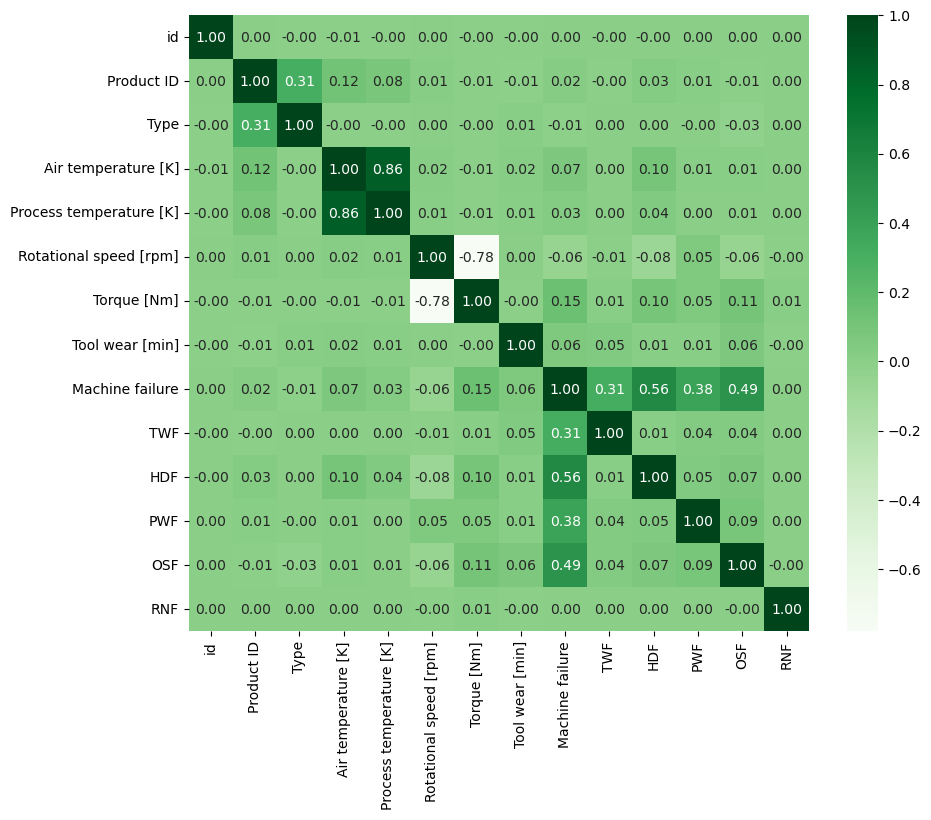

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, fmt='.2f',cmap='Greens')

In [22]:
train_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

> Insight
* feature having co-relation impact **Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm], Torque [Nm],TWF, HDF, PWF,OSF**
* Feature having less co-relation - **id,Tool wear [min],RNF**

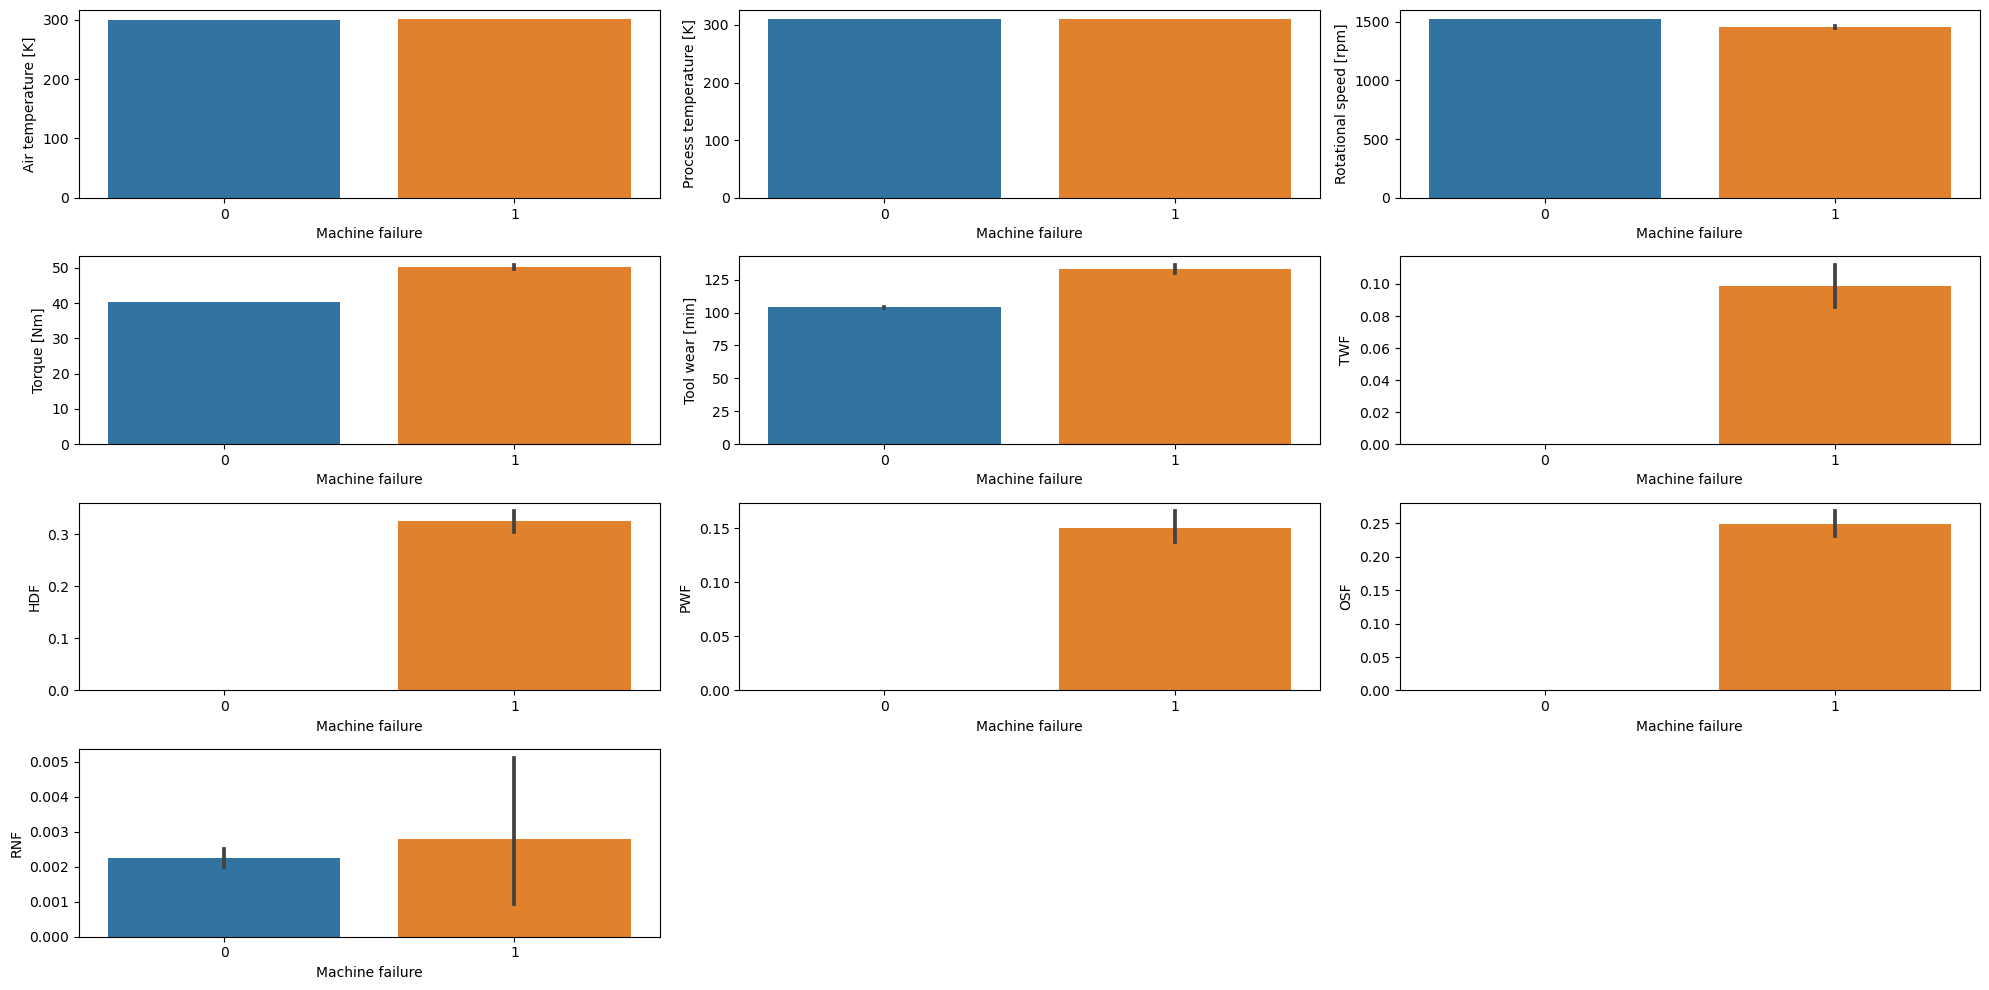

In [23]:
col=['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]','TWF', 'HDF', 'PWF', 'OSF',
       'RNF']
plt.figure(figsize=(20,10))
for i in range(1,len(col)+1):
    plt.subplot(4,3,i)
    sns.barplot(data=train_df,x='Machine failure',y=col[i-1])
plt.tight_layout()

> Insight
for every value  of 'TWF', 'HDF', 'PWF', 'OSF' there is machine failure every time

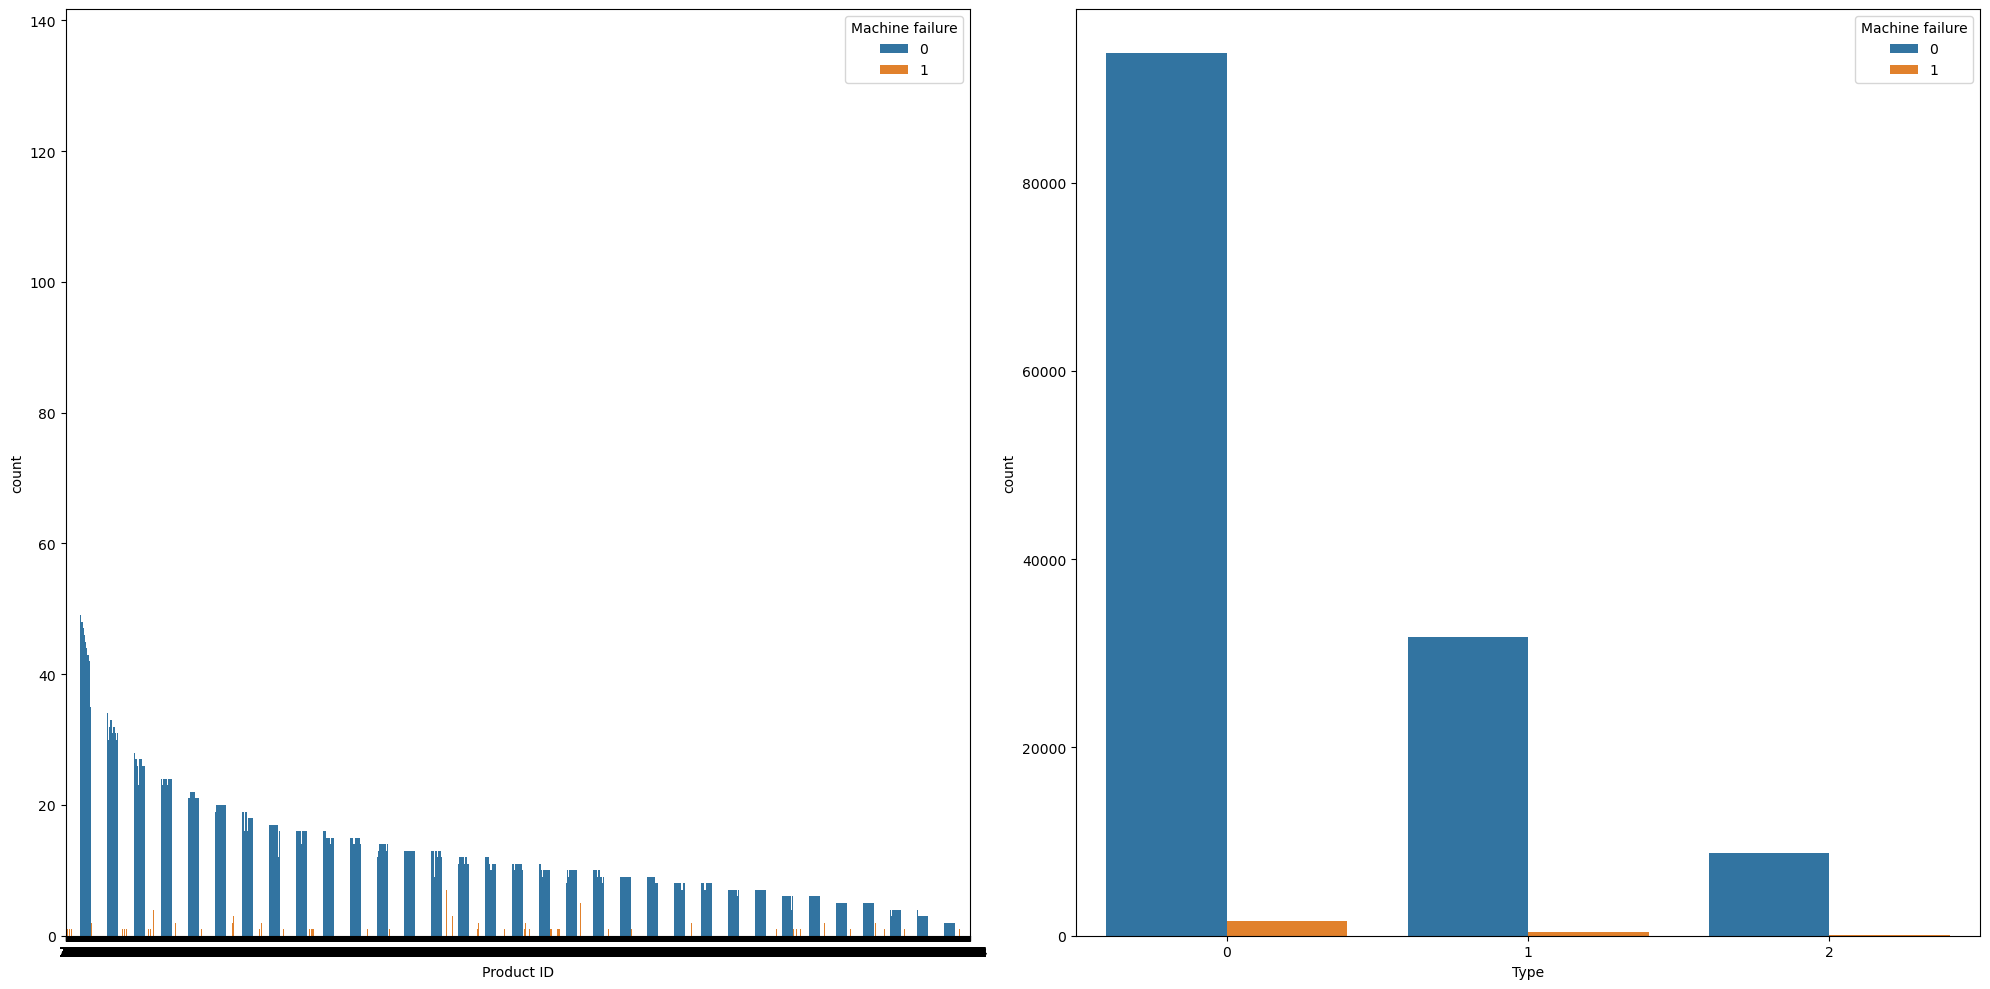

In [24]:
col=['Product ID', 'Type']
key=['Product_ID', 'Type']
plt.figure(figsize=(20,10))
for i in range(1,len(col)+1):
    plt.subplot(1,2,i)
    fig1=sns.countplot(data=train_df,hue='Machine failure',x=col[i-1])
    #fig1.set_xticklabels(key[i-1].keys(),rotation=90) #issue --'str' object has no attribute 'keys'
plt.tight_layout()

# Buliding a model 

In [25]:
# Decision Tree Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [26]:
#splitting input feature and target variable
X=train_df.drop('Machine failure',axis=1)
y=train_df['Machine failure']

In [27]:
#splitting train and test data size
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=42)
X_train=X.copy()
y_train=y.copy()
X_test=test_df.copy()

In [28]:
#Training the model
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
#predicting the value
test_df['Machine failure']=dtree.predict(X_test)

In [30]:
test_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,136429,839,0,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,136430,1370,0,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,136431,4813,0,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,136432,4877,1,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,136433,139,1,303.4,312.3,1515,41.3,114,0,0,0,0,0,0


In [31]:
test_df_final=test_df[['id','Machine failure']]

In [32]:
test_df_final.head()

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0


In [33]:
test_df_final.to_csv('prediction.csv')

In [34]:
#calculating the score 
# accuracy_score(y_test,y_pred)

In [35]:
# print(classification_report(y_test,y_pred))